<p><h2><b>Submitted by Chong Kah Wei A20EC0027</b></h2></p>

<h3><b>EDA For Original Penguin Dataset</b></h3>

In [70]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [71]:
#import the original penguin dataset
df_pg_lter = pd.read_csv('penguins_lter.csv')

In [72]:
#display the first five data
df_pg_lter.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [73]:
#analyse the dimension of the dataset
df_pg_lter.shape

(344, 17)

In [74]:
#analyse the features in the dataset
df_pg_lter.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

<h4><b>Data Cleaning</b></h4>

In [75]:
#drop the columns that are not relevant for eda of this dataset
df_pg_lter.drop(['Individual ID', "Sample Number", "Comments"], axis = 1, inplace=True)
df_pg_lter.shape

(344, 14)

In [76]:
#analyse the data type for the remaining features in the dataset
df_pg_lter.dtypes

studyName               object
Species                 object
Region                  object
Island                  object
Stage                   object
Clutch Completion       object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
dtype: object

In [77]:
#analyse unique value for categorical data
for col in df_pg_lter.select_dtypes(include='object').columns:
    print(df_pg_lter[col].value_counts())

PAL0910    120
PAL0809    114
PAL0708    110
Name: studyName, dtype: int64
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64
Anvers    344
Name: Region, dtype: int64
Biscoe       168
Dream        124
Torgersen     52
Name: Island, dtype: int64
Adult, 1 Egg Stage    344
Name: Stage, dtype: int64
Yes    308
No      36
Name: Clutch Completion, dtype: int64
11/27/07    18
11/9/08     16
11/16/07    16
11/18/09    14
11/4/08     12
11/6/08     12
11/13/08    12
11/21/09    12
11/29/07    10
11/27/09    10
11/15/09    10
11/14/08    10
11/16/09    10
11/22/09    10
11/17/09    10
11/24/08     8
11/28/07     8
11/3/08      8
12/1/09      8
11/9/07      8
11/8/08      8
11/12/07     8
11/13/07     6
11/25/09     6
11/20/09     6
11/2/08      6
12/3/07      6
11/23/09     6
11/9/09      4
11/19/07     4
11/25/08     4
11/30/07     4
11/15/08     4
11/21/07     4
11/26/07 

In [78]:
#replace the unknown sex data to nan
df_pg_lter['Sex'][df_pg_lter['Sex'] == '.'] = np.nan

C:\conda_temp\ipykernel_7056\3842981867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pg_lter['Sex'][df_pg_lter['Sex'] == '.'] = np.nan


In [79]:
#analyse the missing values in the dataset for the remaining features
df_pg_lter.isnull().sum()

studyName               0
Species                 0
Region                  0
Island                  0
Stage                   0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    11
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

In [80]:
#impute the missing value using mean for numerical data and mode for categorical data
for col in df_pg_lter.columns:
    if df_pg_lter[col].dtype != 'O':
        df_pg_lter[col].fillna(df_pg_lter[col].mean(), inplace = True) # using mean to fill null values because there are no outliers
    else:
        df_pg_lter[col].fillna(df_pg_lter[col].mode()[0], inplace = True)

In [81]:
#check again for missing value
df_pg_lter.isnull().sum()

studyName              0
Species                0
Region                 0
Island                 0
Stage                  0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

<h4><b>Analysis Using Visualization</b></h4>

C:\conda_temp\ipykernel_7056\4042662943.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  sp.set_xticklabels(sp.get_xticklabels(), rotation=30, ha ='right')


[Text(0, 0, 'Adelie Penguin (Pygoscelis adeliae)'),
 Text(1, 0, 'Chinstrap penguin (Pygoscelis antarctica)'),
 Text(2, 0, 'Gentoo penguin (Pygoscelis papua)')]

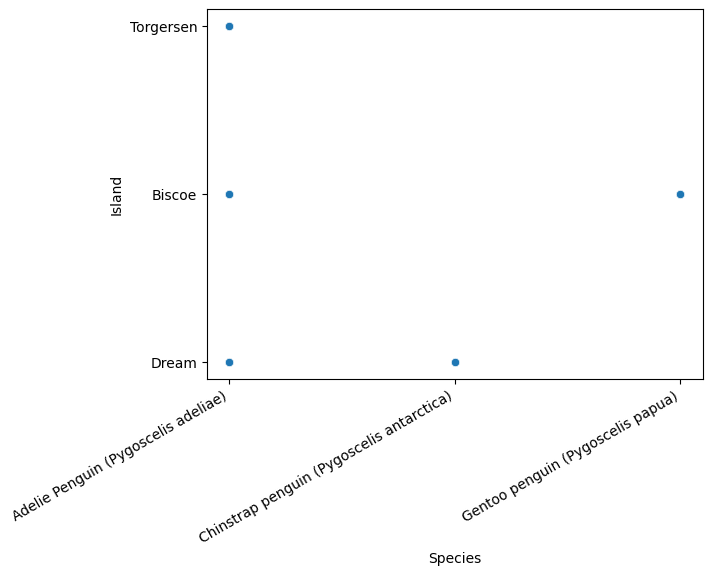

In [82]:
#analysis of species in each island
sp=sns.scatterplot(data=df_pg_lter, x='Species', y='Island')
sp.set_xticklabels(sp.get_xticklabels(), rotation=30, ha ='right')

Scatterplot above shows that Adelie Penguin exist in all three island, Chinstrap Penguin only appear in Dream island, while Gentoo Penguin only appear in Biscoe island.

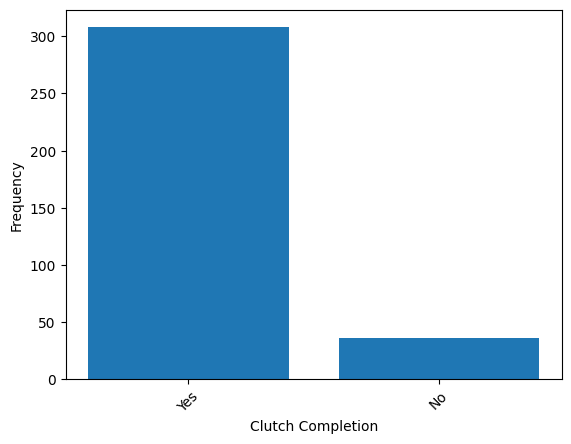

In [83]:
#analysis on number of clutch completion and clutch incompletion
plt.bar( df_pg_lter['Clutch Completion'].value_counts().index,  df_pg_lter['Clutch Completion'].value_counts().values)
plt.xlabel('Clutch Completion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Bar chart above shows that there is a higher number of penguin with clutch completion compared to those without clutch completion.

C:\conda_temp\ipykernel_7056\3502585533.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  hp.set_xticklabels(hp.get_xticklabels(), rotation=30, ha ='right')


[Text(0, 0, 'Adelie Penguin (Pygoscelis adeliae)'),
 Text(1, 0, 'Chinstrap penguin (Pygoscelis antarctica)'),
 Text(2, 0, 'Gentoo penguin (Pygoscelis papua)')]

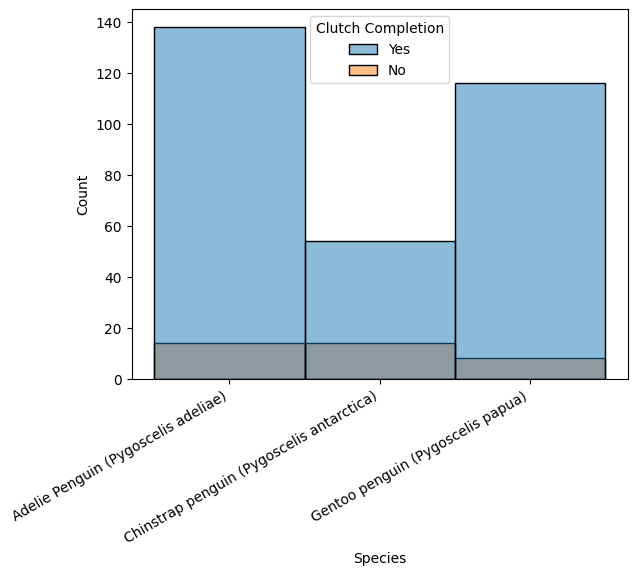

In [84]:
#analysis of clutch completion for each species
hp=sns.histplot(data=df_pg_lter, x="Species", hue="Clutch Completion")
hp.set_xticklabels(hp.get_xticklabels(), rotation=30, ha ='right')

Diagram above shows that Adelle Penguin and Chinstrap Penguin are having the same number of penguin without clutch completion and the number is higher than that of Gentoo Penguin. However, in general, Chinstrap Penguin is having the highest percentage of incomplete clutch.

[Text(0, 0, 'Yes'), Text(1, 0, 'No')]

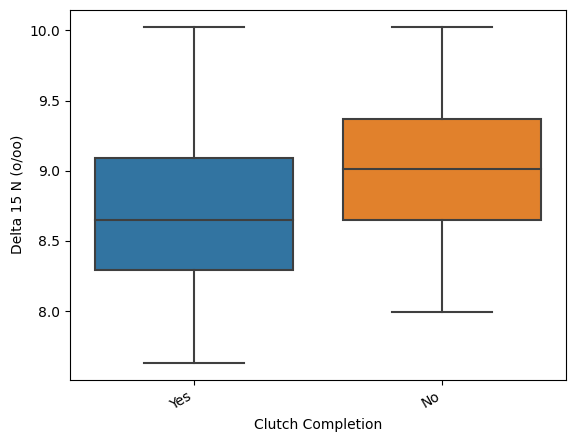

In [85]:
#analysis on delta 15 n of penguin with clutch completion and clutch incompletion
bp=sns.boxplot(x='Clutch Completion', y='Delta 15 N (o/oo)', data=df_pg_lter)
bp.set_xticklabels(bp.get_xticklabels(), rotation=30, ha ='right')

Boxplot above shows that median of delta 15 N of penguin without clutch completion is higher. The boxplot of clutch completion is negatively skewed.

[Text(0, 0, 'Yes'), Text(1, 0, 'No')]

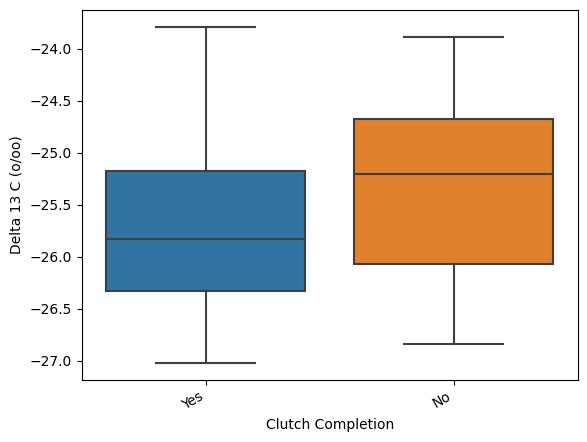

In [86]:
#analysis on delta 13 c of penguin with clutch completion and clutch incompletion
bp=sns.boxplot(x='Clutch Completion', y='Delta 13 C (o/oo)', data=df_pg_lter)
bp.set_xticklabels(bp.get_xticklabels(), rotation=30, ha ='right')

Boxplot above shows that median of delta 13 C of penguin without clutch completion is higher. The boxplot of clutch completion is negatively skewed while the boxplot of penguin without clutch completion is positively skewed.

[Text(0, 0, 'Adelie Penguin (Pygoscelis adeliae)'),
 Text(1, 0, 'Chinstrap penguin (Pygoscelis antarctica)'),
 Text(2, 0, 'Gentoo penguin (Pygoscelis papua)')]

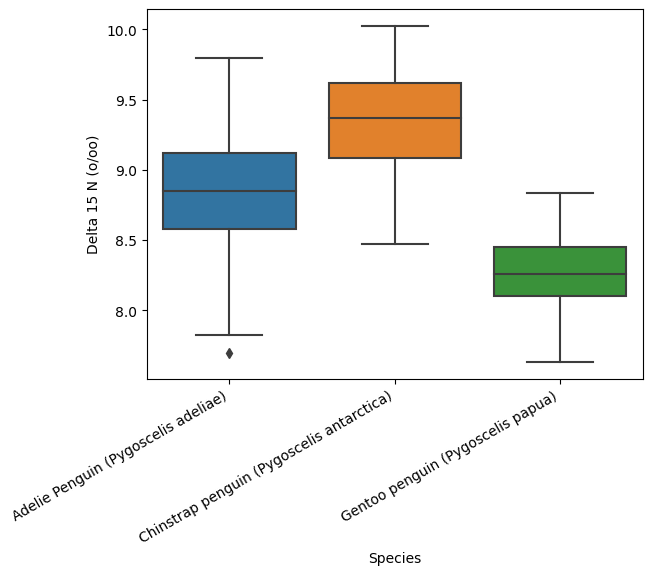

In [87]:
#analysis on delta 15 n of different species of penguin
bp=sns.boxplot(x='Species', y='Delta 15 N (o/oo)', data=df_pg_lter)
bp.set_xticklabels(bp.get_xticklabels(), rotation=30, ha ='right')

Boxplot above shows that Chinstrap penguin has the highest median of delta 15 N, while Gentoo penguin has the lowest median of delta 15 N. Adelle penguin is having a moderate median in this case but its range is larger than the other two species of penguins. There is an outlier for Adelie penguin.

[Text(0, 0, 'Adelie Penguin (Pygoscelis adeliae)'),
 Text(1, 0, 'Chinstrap penguin (Pygoscelis antarctica)'),
 Text(2, 0, 'Gentoo penguin (Pygoscelis papua)')]

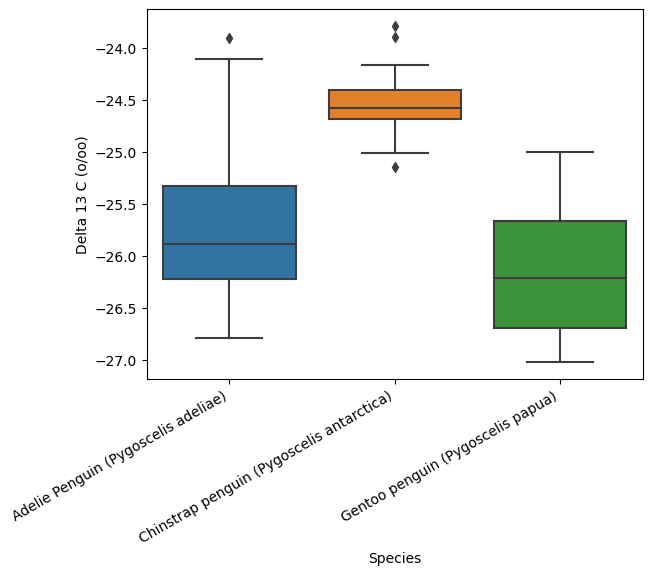

In [88]:
#analysis on delta 13 c of different species of penguin
bp=sns.boxplot(x='Species', y='Delta 13 C (o/oo)', data=df_pg_lter)
bp.set_xticklabels(bp.get_xticklabels(), rotation=30, ha ='right')

Boxplot above shows that Chinstrap penguin has the highest median of delta 13 C, while Gentoo penguin has the lowest median of delta 13 C. The distribution of delta 13 C between these two species of penguin is quite distinct. Adelle penguin is having a moderate median in this case but its range is larger than the other two species of penguins, its distribution of delta 13 C ia overlap with Gentoo penguin as well. Moreover, there are outlier for Adelie and Chinstrap penguin.

(7.0, 10.145102)

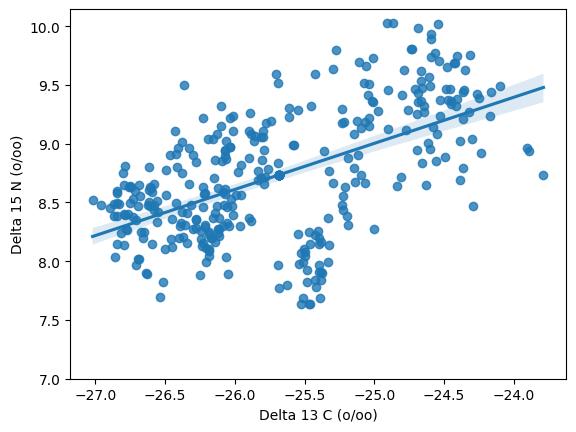

In [89]:
#correlation of delta 13 c and delta 15 n
sns.regplot(x="Delta 13 C (o/oo)", y="Delta 15 N (o/oo)", data=df_pg_lter)
plt.ylim(7,)

The graph shows that the value of delta 15 N increases with the value of delta 13 C.

(2000.0, 6480.0)

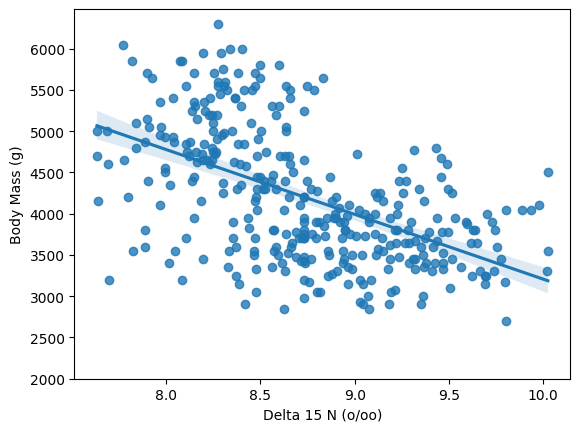

In [90]:
#correlation of delta 13 c and body mass 
sns.regplot(x="Delta 15 N (o/oo)", y="Body Mass (g)", data=df_pg_lter)
plt.ylim(2000,)

The graph shows that the value of body mass decreases with the value of delta 15 N.

(2000.0, 6480.0)

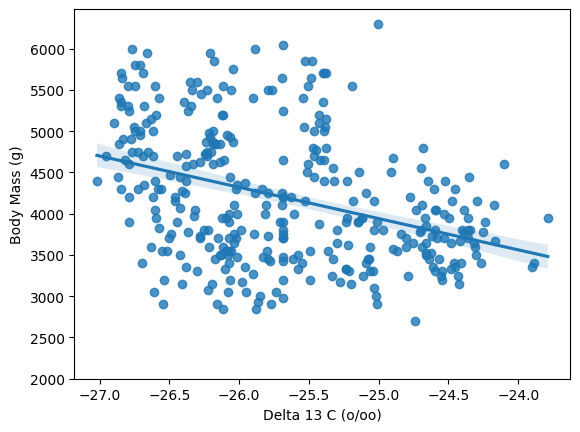

In [91]:
#correlation of delta 13 c and body mass 
sns.regplot(x="Delta 13 C (o/oo)", y="Body Mass (g)", data=df_pg_lter)
plt.ylim(2000,)

The graph shows that the value of body mass decreases with the value of delta 13 C.

<h4><b>Descriptive Statistical Analysis</b></h4>

In [92]:
#statistical analysis of the numerical data
df_pg_lter.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,5.443643,1.969027,14.020657,799.613058,0.540392,0.778770
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,39.275000,15.600000,190.000000,3550.000000,8.307415,-26.285460
50%,44.250000,17.300000,197.000000,4050.000000,8.687455,-25.793660
75%,48.500000,18.700000,213.000000,4750.000000,9.136170,-25.089467
max,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [93]:
#statistical analysis of the categorical data
df_pg_lter.describe(include=['object'])

,studyName,Species,Region,Island,Stage,Clutch Completion,Date Egg,Sex
count,344,344,344,344,344,344,344,344
unique,3,3,1,3,1,2,50,2
top,PAL0910,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",Yes,11/27/07,MALE
freq,120,152,344,168,344,308,18,179


In [94]:
#analyse the correlation among the numerical data
df_pg_lter.corr()

C:\conda_temp\ipykernel_7056\848378965.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_pg_lter.corr()


,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Culmen Length (mm),1.000000,-0.235053,0.656181,0.595110,-0.058562,0.185820
Culmen Depth (mm),-0.235053,1.000000,-0.583851,-0.471916,0.596275,0.424059
Flipper Length (mm),0.656181,-0.583851,1.000000,0.871202,-0.495253,-0.366999
Body Mass (g),0.595110,-0.471916,0.871202,1.000000,-0.530444,-0.369514
Delta 15 N (o/oo),-0.058562,0.596275,-0.495253,-0.530444,1.000000,0.565634
Delta 13 C (o/oo),0.185820,0.424059,-0.366999,-0.369514,0.565634,1.000000


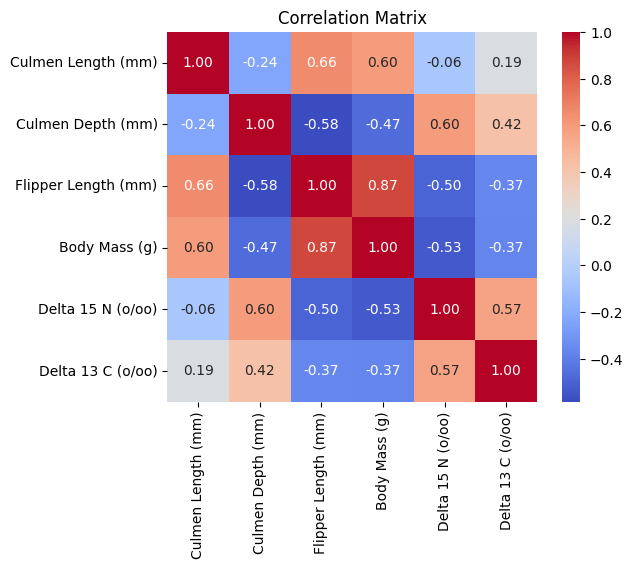

In [95]:
#correlation matrix of numerical data
vars = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
correlation_matrix = df_pg_lter[vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

Figure above shows the correlation matrix. To interpret the correlation between the features, -1 indicates a perfectly negative linear correlation between two variables, 0 indicates no linear correlation between two variables and 1 indicates a perfectly positive linear correlation between two variables. From the figure, we can see that there is the highest positive corrrelation between flipper length and body mass which is 0.87 and there is also the highest negative correlation between flipper length and culmen depth which is -0.58.

In [96]:
#compare body mass and clutch completion among the three penguin species
df_gptest = df_pg_lter[['Species','Clutch Completion','Body Mass (g)']]
grouped_test1 = df_gptest.groupby(['Species','Clutch Completion'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='Species',columns='Clutch Completion')
grouped_pivot

Body Mass (g)             
Clutch Completion                                    No          Yes
Species                                                             
Adelie Penguin (Pygoscelis adeliae)         3712.500000  3703.092423
Chinstrap penguin (Pygoscelis antarctica)   3580.357143  3772.685185
Gentoo penguin (Pygoscelis papua)           4822.094298  5085.991379

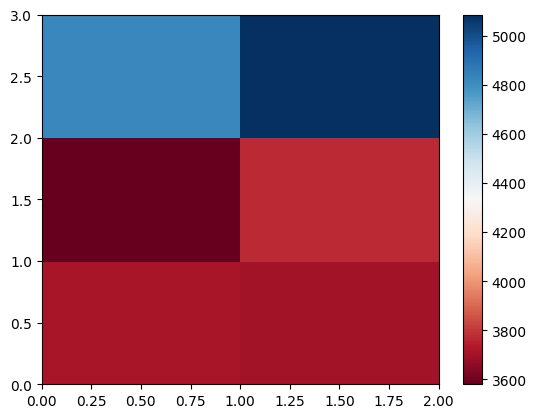

In [97]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

Figure above analyse the relationship between the mean body mass with the clutch completion of each species. However, it does not show significant relationship between the two variables.

In [98]:
#compare sex and delta 15 N among the three penguin species
df_gptest = df_pg_lter[['Species','Sex','Delta 15 N (o/oo)']]
grouped_test1 = df_gptest.groupby(['Species','Sex'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='Species',columns='Sex')
grouped_pivot

Delta 15 N (o/oo)          
Sex                                                  FEMALE      MALE
Species                                                              
Adelie Penguin (Pygoscelis adeliae)                8.791634  8.905066
Chinstrap penguin (Pygoscelis antarctica)          9.250962  9.443031
Gentoo penguin (Pygoscelis papua)                  8.193405  8.305766

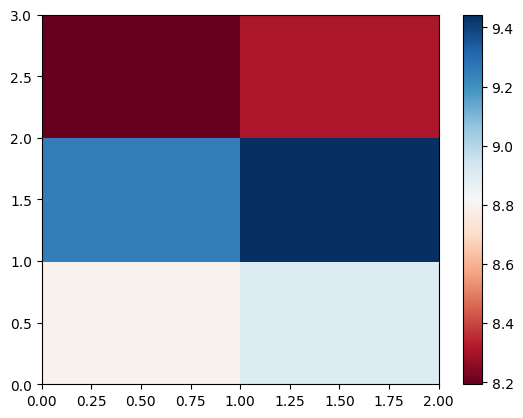

In [99]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

Figure above shows that for the three species of penguins, male penguins have a higher value of delta 15 N compared to female penguins.

In [100]:
#compare sex and delta 13 C among the three penguin species
df_gptest = df_pg_lter[['Species','Sex','Delta 13 C (o/oo)']]
grouped_test2 = df_gptest.groupby(['Species','Sex'],as_index=False).mean()
grouped_pivot = grouped_test2.pivot(index='Species',columns='Sex')
grouped_pivot

Delta 13 C (o/oo)           
Sex                                                  FEMALE       MALE
Species                                                               
Adelie Penguin (Pygoscelis adeliae)              -25.791203 -25.799781
Chinstrap penguin (Pygoscelis antarctica)        -24.565405 -24.527679
Gentoo penguin (Pygoscelis papua)                -26.197205 -26.159713

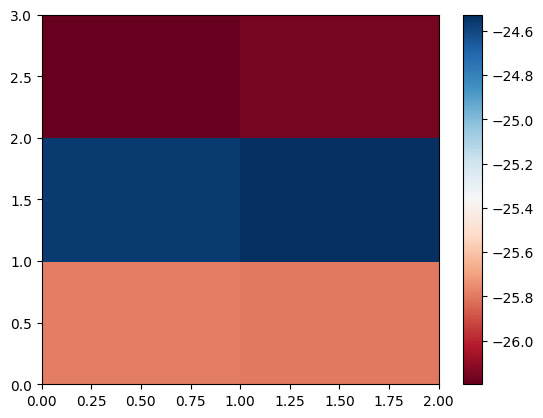

In [101]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

Figure above analyse the relationship between the Delta 13 C with the sex of penguins of each species but it does not show significant relationship between the two variables. 

In [102]:
#Delta 15 N vs Delta 13 C
pearson_coef, p_value = stats.pearsonr(df_pg_lter['Delta 15 N (o/oo)'], df_pg_lter['Delta 13 C (o/oo)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5656340968408079  with a P-value of P = 1.7570982207395772e-30


Based on the analysis above:
<p>Since the p-value is lesser than 0.001, the correlation between Delta 15 N and Delta 13 C is statistically significant, although the linear relationship isn't extremely strong (~0.566)</p>

--------------------------------------------------------------------------------------------------------------------------------

<h3><b>EDA of Simplified Penguin Dataset</b></h3>

In [103]:
#import the original penguin dataset
df_pg_size = pd.read_csv('penguins_size.csv')

In [104]:
#first five data
df_pg_size.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [105]:
#analyse the dimension of the dataset
df_pg_size.shape

(344, 7)

In [106]:
#analyse the features in the dataset
df_pg_size.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [107]:
#analyse the data type for the features in the dataset
df_pg_size.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

<h4><b>Data Cleaning</b></h4>

In [108]:
#analyse unique value for categorical data
for col in df_pg_size.select_dtypes(include='object').columns:
    print(df_pg_size[col].value_counts())

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64
MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64


In [109]:
#replace the unknown sex data to nan
df_pg_size['sex'][df_pg_size['sex'] == '.'] = np.nan

C:\conda_temp\ipykernel_7056\2100489440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pg_size['sex'][df_pg_size['sex'] == '.'] = np.nan


In [110]:
#check for missing value
df_pg_size.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [111]:
#impute the missing value using mean for numerical data and mode for categorical data
for col in df_pg_size.columns:
    if df_pg_size[col].dtype != 'O':
        df_pg_size[col].fillna(df_pg_size[col].mean(), inplace = True) # using mean to fill null values because there are no outliers
    else:
        df_pg_size[col].fillna(df_pg_size[col].mode()[0], inplace = True)

In [112]:
#check again for missing value
df_pg_size.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<h4><b>Analysing Using Visualization</b></h4>

[Text(0, 0, 'Adelie'), Text(1, 0, 'Chinstrap'), Text(2, 0, 'Gentoo')]

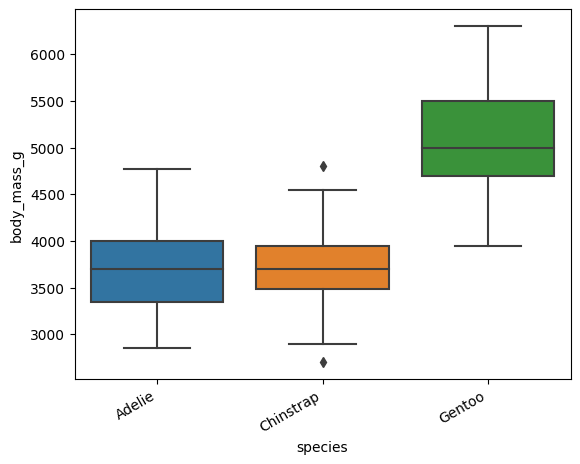

In [113]:
bp=sns.boxplot(x='species', y='body_mass_g', data=df_pg_size)
bp.set_xticklabels(bp.get_xticklabels(), rotation=30, ha ='right')

The median of body mass for Adelie and Chinstrap is relatively similar and their distribution of body mass are overlap. While for Gentoo penguin, the median of body mass is higher than the other two species of penguin. The boxplot of the Gentoo penguin is negatively skewed, and there is an outlier for the body mass of Chinstrap.

[Text(0, 0, 'MALE'), Text(1, 0, 'FEMALE')]

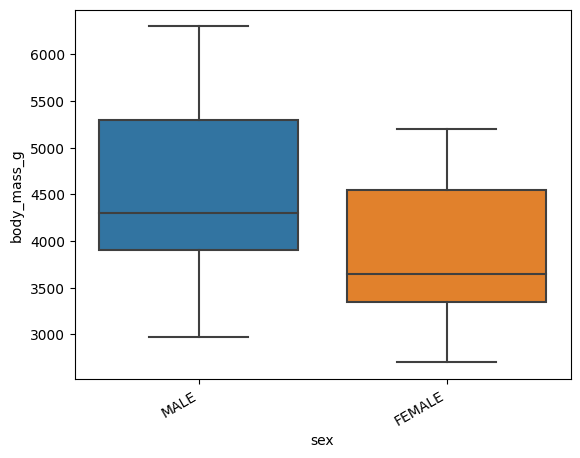

In [114]:
bp=sns.boxplot(x='sex', y='body_mass_g', data=df_pg_size)
bp.set_xticklabels(bp.get_xticklabels(), rotation=30, ha ='right')

The median of male's body mass is higher than that of the female's body mass. Both boxplots are negatively skewed.

[Text(0, 0, 'Adelie'), Text(1, 0, 'Chinstrap'), Text(2, 0, 'Gentoo')]

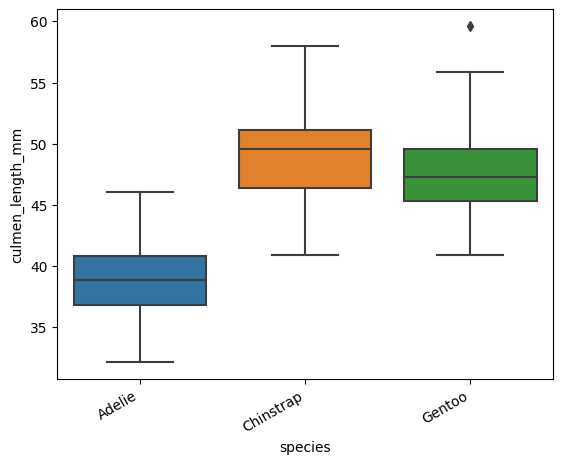

In [115]:
bp=sns.boxplot(x='species', y='culmen_length_mm', data=df_pg_size)
bp.set_xticklabels(bp.get_xticklabels(), rotation=30, ha ='right')

The boxplot above shows the median of culmen length of Adelie penguin the lowest compared to Chinstrap and Gentoo penguin while the median of Chinstrap penguin in term of culmen length is higher than Gentoo Penguin. The boxplot distribution of Chinstrap and Gentoo is overlapping. However, there is an outlier for Gentoo penguin.

[Text(0, 0, 'MALE'), Text(1, 0, 'FEMALE')]

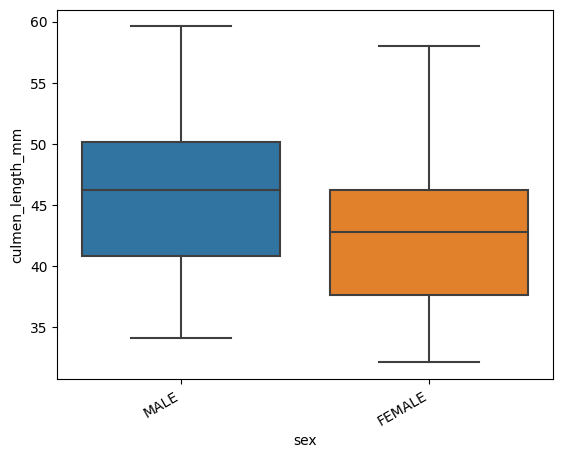

In [116]:
bp=sns.boxplot(x='sex', y='culmen_length_mm', data=df_pg_size)
bp.set_xticklabels(bp.get_xticklabels(), rotation=30, ha ='right')

The median of male's culmen length is higher than the female's culmen length. Both boxplots are positively skewed.

[Text(0, 0, 'Adelie'), Text(1, 0, 'Chinstrap'), Text(2, 0, 'Gentoo')]

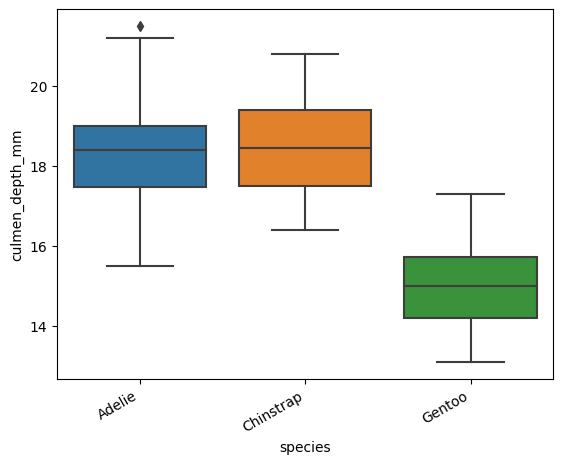

In [117]:
bp=sns.boxplot(x='species', y='culmen_depth_mm', data=df_pg_size)
bp.set_xticklabels(bp.get_xticklabels(), rotation=30, ha ='right')

The boxplots above shows that the median of culmen depth of Gentoo is the lowest among the three species of penguin, whereas Adelie and Chinstrap has a relatively similar median of culmen depth. However, the range of culmen depth for Adelie is larger than Chinstrap, and there is an outlier for Adelie.

[Text(0, 0, 'MALE'), Text(1, 0, 'FEMALE')]

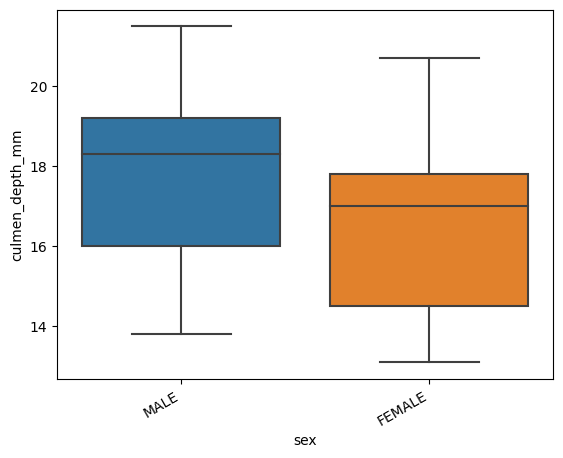

In [118]:
bp=sns.boxplot(x='sex', y='culmen_depth_mm', data=df_pg_size)
bp.set_xticklabels(bp.get_xticklabels(), rotation=30, ha ='right')

The median of male's culmen depth is higher than the female's culmen depth. Both boxplots are positively skewed.

[Text(0, 0, 'Adelie'), Text(1, 0, 'Chinstrap'), Text(2, 0, 'Gentoo')]

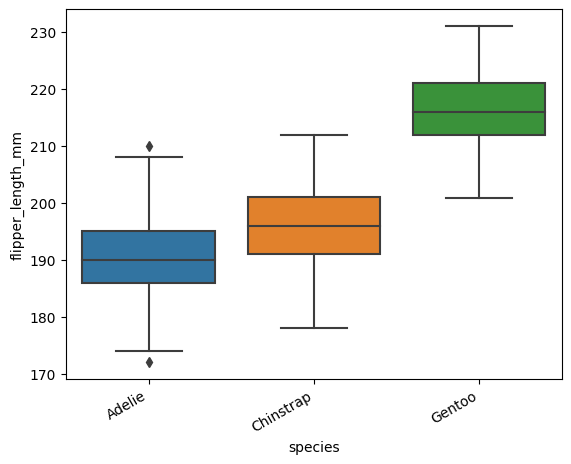

In [119]:
bp=sns.boxplot(x='species', y='flipper_length_mm', data=df_pg_size)
bp.set_xticklabels(bp.get_xticklabels(), rotation=30, ha ='right')

In term of flipper length, Gentoo has the highest median, Chinstrap has a moderate median and Adelie has the lowest median. There are outliers for Adelie.

[Text(0, 0, 'MALE'), Text(1, 0, 'FEMALE')]

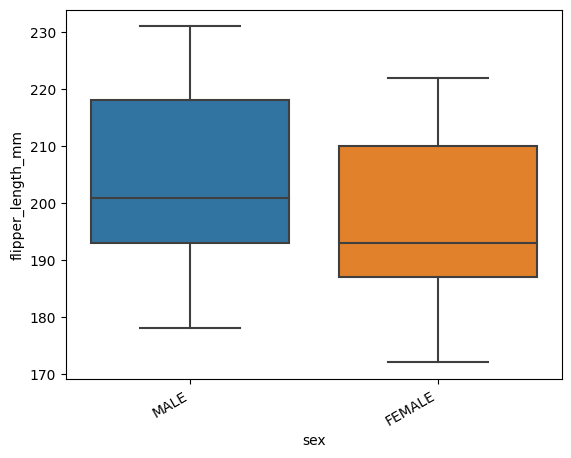

In [120]:
bp=sns.boxplot(x='sex', y='flipper_length_mm', data=df_pg_size)
bp.set_xticklabels(bp.get_xticklabels(), rotation=30, ha ='right')

The median of male's flipper length is higher than the female's flipper length. Both boxplots are negatively skewed.

(160.0, 238.19485211197807)

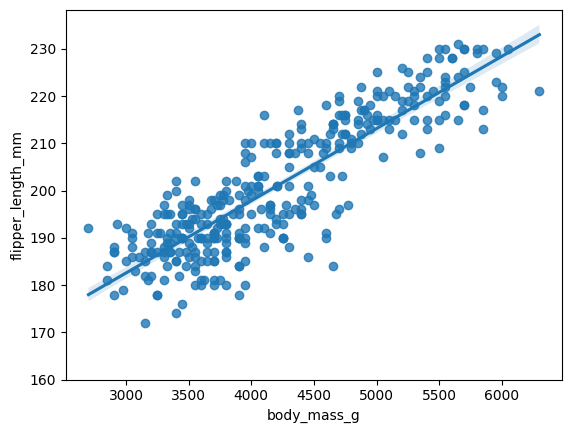

In [121]:
sns.regplot(x="body_mass_g", y="flipper_length_mm", data=df_pg_size)
plt.ylim(160,)

The graph shows that the value of flipper length increases with the value of body mass.

(30.0, 60.975)

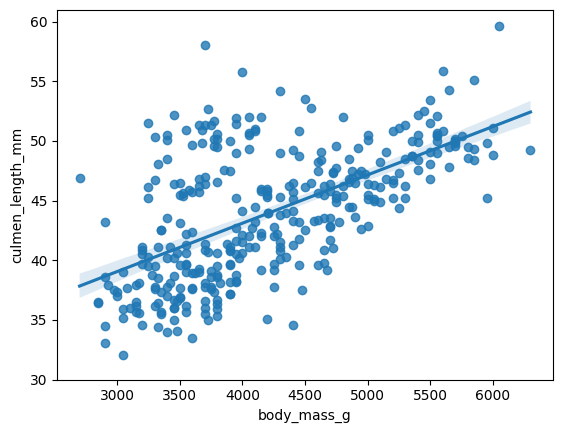

In [122]:
sns.regplot(x="body_mass_g", y="culmen_length_mm", data=df_pg_size)
plt.ylim(30,)

The graph shows that the value of culmen length increases with the value of body mass.

(12.0, 21.92)

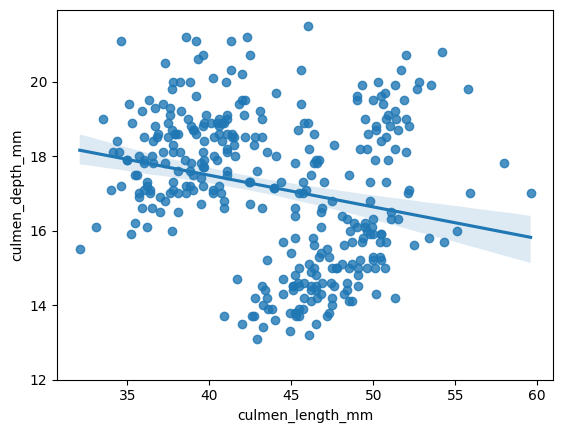

In [123]:
sns.regplot(x="culmen_length_mm", y="culmen_depth_mm", data=df_pg_size)
plt.ylim(12,)

The graph shows that the value of culmen depth decreases with the value of culmen length.

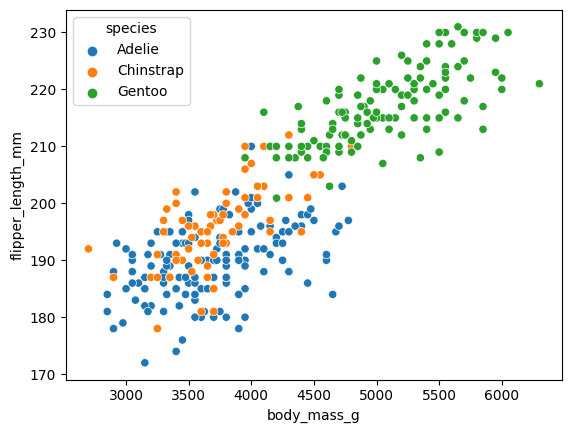

In [124]:
sns.scatterplot(data=df_pg_size, x='body_mass_g', y='flipper_length_mm', hue='species')
plt.xlabel('body_mass_g')
plt.ylabel('flipper_length_mm')
plt.show()

Based on the scatter plot, it shows that the body mass of Gentoo penguin is higher than both Adelie penguin and Chinstrap Penguin and Adelie penguin is having a relatively similar range in body mass with Chinstrap Penguin. On the other hand, it also shows a positive correlation between body mass and flipper length, so when the body mass increase, the flipper length increase as well.

<h4><b>Descriptive Statistical Analysis</b></h4>

In [125]:
#statistical analysis of the numerical data
df_pg_size.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [126]:
#statistical analysis of the categorical data
df_pg_size.describe(include=['object'])

,species,island,sex
count,344,344,344
unique,3,3,2
top,Adelie,Biscoe,MALE
freq,152,168,179


In [127]:
#analyse the correlation among the numerical data
df_pg_size.corr()

C:\conda_temp\ipykernel_7056\3533159462.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_pg_size.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


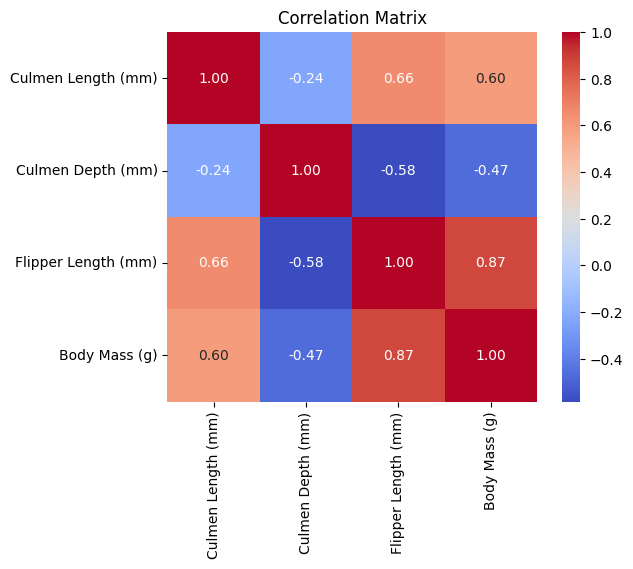

In [128]:
#correlation matrix of numerical data
vars = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']
correlation_matrix = df_pg_lter[vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix above, we can see that there is the highest positive corrrelation between flipper length and body mass which is 0.87 and there is also the highest negative correlation between flipper length and culmen depth which is -0.58.

In [129]:
# grouping by species
df_group_species = df_pg_size.groupby(['species'],as_index=False).mean()
df_group_species

C:\conda_temp\ipykernel_7056\3310803024.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_species = df_pg_size.groupby(['species'],as_index=False).mean()


,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,38.825144,18.338495,190.025758,3703.958910
1,Chinstrap,48.833824,18.420588,195.823529,3733.088235
2,Gentoo,47.475983,14.999606,217.055768,5068.965761


From the grouping result above, Chinstrap has the longest and deepest culmen, but they are moderate in flipper length and body mass. Gentoo has the largest body mass and longest flipper, but they have a moderate value in culmen length and the shallowest culmen depth. On the other hand, Adelie has the smallest body mass, shortest flipper length, shortest culmen length and a moderate culmen depth.

In [130]:
# grouping by sex
df_group_sex = df_pg_size.groupby(['sex'],as_index=False).mean()
df_group_sex

C:\conda_temp\ipykernel_7056\2844072989.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_sex = df_pg_size.groupby(['sex'],as_index=False).mean()


,sex,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,FEMALE,42.096970,16.425455,197.363636,3862.272727
1,MALE,45.604156,17.820125,204.188997,4514.684407


Based on above grouping result, male penguin has a larger measurement in culmen length, culmen depth, flipper length and body mass compared to female penguin. In another word, male penguin will be larger in size compared to female penguin.

In [131]:
#analyse the mean body mass of the penguin in each island
df_gptest = df_pg_size[['species','island','body_mass_g']]
grouped_test1 = df_gptest.groupby(['species','island'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='species',columns='island')
grouped_pivot

body_mass_g                          
island          Biscoe        Dream    Torgersen
species                                         
Adelie     3709.659091  3688.392857  3715.899123
Chinstrap          NaN  3733.088235          NaN
Gentoo     5068.965761          NaN          NaN

Based on the result above, we can see that Gentoo Penguin is having the largest body mass among the three species of penguin.   Chinstrap is having a moderate body mass, while Adelie is having a smallest body mass. However, the body mass between Adelie and Chinstrap are not significantly distinct. When comparing the body mass of Adelie penguin among the three island, Adelie penguin in Torgesen is having the largest body mass.

In [132]:
#body mass vs flipper length
pearson_coef, p_value = stats.pearsonr(df_pg_size['body_mass_g'], df_pg_size['flipper_length_mm'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is 0.8712017673060113  with a P-value of P =  1.05029243142103e-107


Based on the analysis above:
<p>Since the p-value is lesser than 0.001, the correlation between body mass and flipper length is statistically significant, and the linear relationship is positive and very strong (~0.871)</p>

In [133]:
#body mass vs culmen length
pearson_coef, p_value = stats.pearsonr(df_pg_size['body_mass_g'], df_pg_size['culmen_length_mm'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is 0.5951098244376303  with a P-value of P =  2.4524401663145057e-34


Based on the analysis above:
<p>Since the p-value is lesser than 0.001, the correlation between body mass and culmen length is statistically significant, the linear relationship is positive but not extremely strong (~0.595)</p>

In [134]:
#flipper length vs culmen length
pearson_coef, p_value = stats.pearsonr(df_pg_size['flipper_length_mm'], df_pg_size['culmen_length_mm'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is 0.6561813407464283  with a P-value of P =  9.901821569369762e-44


Based on the analysis above:
<p>Since the p-value is lesser than 0.001, the correlation between flipper length and culmen length is statistically significant, the linear relationship is positive but not strong (~0.656)</p>

In [135]:
#body mass vs culmen depth
pearson_coef, p_value = stats.pearsonr(df_pg_size['body_mass_g'], df_pg_size['culmen_depth_mm'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.47191562118606645  with a P-value of P =  1.7647813131262327e-20


Based on the analysis above:
<p>Since the p-value is lesser than 0.001, the correlation between body mass and culmen depth is statistically significant, the linear relationship is negative and not extremely strong (~-0.472)</p>

In [136]:
#culmen depth vs culmen length
pearson_coef, p_value = stats.pearsonr(df_pg_size['culmen_depth_mm'], df_pg_size['culmen_length_mm'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.23505287035553277  with a P-value of P =  1.0549581402098362e-05


Based on the analysis above:
<p>Since the p-value is lesser than 0.001, the correlation between culmen depth and culmen length is statistically significant, although the linear relationship is negative and very weak (~-0.235)</p>

In [137]:
#flipper length vs culmen depth
pearson_coef, p_value = stats.pearsonr(df_pg_size['flipper_length_mm'], df_pg_size['culmen_depth_mm'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.5838512164654127  with a P-value of P =  8.101668517586757e-33


Based on the analysis above:
<p>Since the p-value is lesser than 0.001, the correlation between flipper length and culmen depth is statistically significant, although the linear relationship is negative and quite weak (~-0.584)</p>

---------------------------------------------------------------------------------------------------------------------------------

<h3><b>Summary:</b></h3>
<p>From the original penguin dataset and the simplified penguin dataset, I found that there are three types of penguin, that are, Adelie, Chinstrap and Gentoo, in which Adelie appears in Torgesrsen, Biscoe and Dream, Chinstrap appears only in Dream and Gentoo only appears in Biscoe. I discover that Chinstrap penguin has the highest percentage of incomplete clutch. In terms of blood isotope, Chinstrap penguin has the highest median of Delta 15 N and Delta 13 C, Adelie penguin has moderate median of Delta 15 N and Delta 13 C, while Gentoo penguin has the lowest median of Delta 15 N and Delta 13 C. The value of Delta 15 N is positively correlated with Delta 13 C, whereby the value of Delta 15 N increases with the value of Delta 13 C. On the other hand, the body mass of the penguins decrease with the value of Delta 15 N and Delta 13 C. Furthermore, the male penguins have a higher value of Delta 15 N compared to female penguins.</p>
</br>
<p>Nevertheless, Chinstrap has the longest and deepest culmen, but they are moderate in flipper length and body mass. Gentoo has the largest body mass and longest flipper, but they only have a moderate value in culmen length and the lowest value in culmen depth. On the other hand, Adelie has the smallest body mass, shortest flipper length, shortest culmen length and a moderate culmen depth. When comparing the characteristics between the sex of penguin, male penguin has a larger value in culmen length, culmen depth, flipper length and body mass compared to female penguin. Besides, I also found that the value of body mass and flipper length are positively and strongly correlates. In facts, these two variables are having the p-value which is lesser than 0.001, meaning that the correlation between the body mass and flipper length is statistically significant, and their linear relationship (~0.871) can be considered as very strong. Nevertheless, there are also findings which indicate the positive correlation between body mass and culmen length, positive correlation between culmen length and flipper length, negative correlation between body mass and culmen depth, negative correlation between culmen depth and culmen length, and negative correlation between flipper length and culmen depth.</p>
</br>
<p>With regards to the appearance for each penguins, we can conclude that Adelie is the smallest in body and flipper size, and they might have a shortest and the moderately deep culmen among the three species of penguins. Chinstrap is moderate in body and flipper size, but they have the longest and deepest culmen, which can differentiate them from the other species of penguins. Gentoo might be the largest in body and flipper size, but they has the moderately short and the shallowest culmen compared to the other two species of penguin. Aside from that, male penguins are generally larger in size when comparing to female penguins.</p>